<a href="https://colab.research.google.com/github/Sainikithaharish06/Titanic.project/blob/main/titanic_rf_dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from matplotlib import pyplot as plt


In [ ]:
Titanic=pd.read_csv('Titanic.csv')
Titanic.head(6)
          

,PassengerId,Pclass,Gender,Age,SibSp,Embarked,Survived
0,1,3,male,22.0,1,S,0
1,2,1,female,38.0,1,C,1
2,3,3,female,26.0,0,S,1
3,4,1,female,35.0,1,S,1
4,5,3,male,35.0,0,S,0
5,6,3,male,NaN,0,Q,0


In [ ]:
Titanic.shape


(891, 7)

In [ ]:
Titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Gender       891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Embarked     889 non-null    object 
 6   Survived     891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [ ]:
Titanic.isna().sum()

PassengerId      0
Pclass           0
Gender           0
Age            177
SibSp            0
Embarked         2
Survived         0
dtype: int64

In [ ]:
Titanic.describe()

,PassengerId,Pclass,Age,SibSp,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,1.000000


In [ ]:
Titanic["Age"].fillna(Titanic["Age"].mode()[0],inplace=True)

In [ ]:
Titanic["Age"].mode()[0]

24.0

In [ ]:
Titanic.describe()

,PassengerId,Pclass,Age,SibSp,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,28.566970,0.523008,0.383838
std,257.353842,0.836071,13.199572,1.102743,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,3.000000,24.000000,0.000000,0.000000
75%,668.500000,3.000000,35.000000,1.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,1.000000


In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Gender       891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Embarked     889 non-null    object 
 6   Survived     891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [ ]:
Titanic.isna().sum()

PassengerId    0
Pclass         0
Gender         0
Age            0
SibSp          0
Embarked       2
Survived       0
dtype: int64

In [ ]:
Titanic['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
Titanic['Gender'].replace(['female','male'],[0,1],inplace=True)

In [ ]:
Titanic.head(6)

,PassengerId,Pclass,Gender,Age,SibSp,Embarked,Survived
0,1,3,1,22.0,1,0.0,0
1,2,1,0,38.0,1,1.0,1
2,3,3,0,26.0,0,0.0,1
3,4,1,0,35.0,1,0.0,1
4,5,3,1,35.0,0,0.0,0
5,6,3,1,24.0,0,2.0,0


In [ ]:
Titanic["Embarked"].fillna(Titanic["Embarked"].mode()[0],inplace=True)
Titanic["Embarked"].mode()[0]



0.0

In [ ]:
Titanic.value_counts

<bound method DataFrame.value_counts of      PassengerId  Pclass  Gender   Age  SibSp  Embarked  Survived
0              1       3       1  22.0      1       0.0         0
1              2       1       0  38.0      1       1.0         1
2              3       3       0  26.0      0       0.0         1
3              4       1       0  35.0      1       0.0         1
4              5       3       1  35.0      0       0.0         0
..           ...     ...     ...   ...    ...       ...       ...
886          887       2       1  27.0      0       0.0         0
887          888       1       0  19.0      0       0.0         1
888          889       3       0  24.0      1       0.0         0
889          890       1       1  26.0      0       1.0         1
890          891       3       1  32.0      0       2.0         0

[891 rows x 7 columns]>

In [ ]:
import seaborn as sns


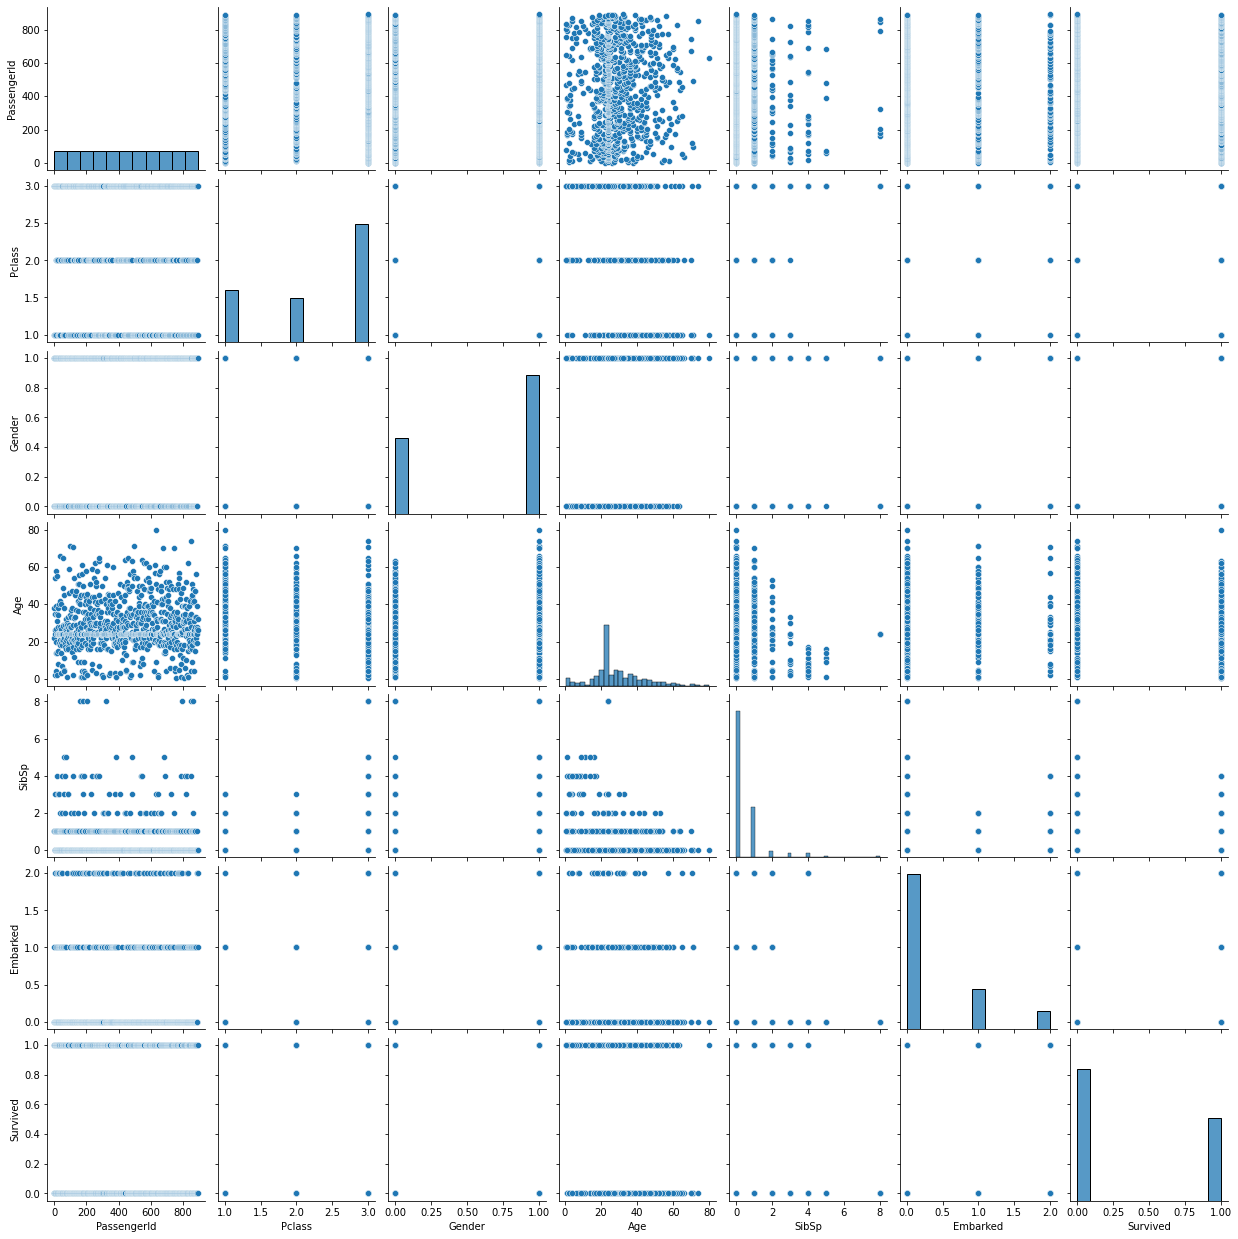

In [ ]:
sns.pairplot(Titanic)
plt.show()

In [ ]:
correlation=Titanic.corr()

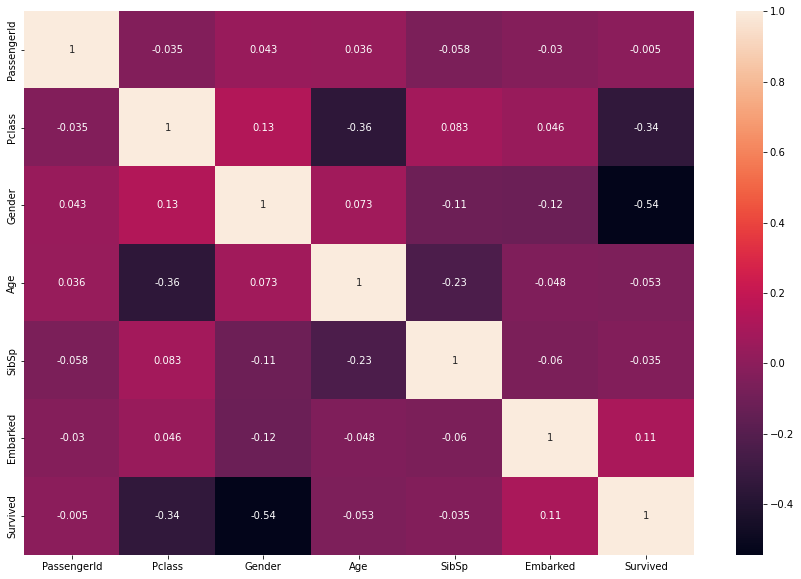

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
X=Titanic[['PassengerId','Pclass','Gender','Age','SibSp','Embarked']]
Y=Titanic['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X,Y,test_size=0.30,train_size=0.70)
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X,Y,test_size=0.20,train_size=0.80)
X3_train,X3_test,Y3_train,Y3_test = train_test_split(X,Y,test_size=0.35,train_size=0.65)
X4_train,X4_test,Y4_train,Y4_test = train_test_split(X,Y,test_size=0.25,train_size=0.75)
X5_train,X5_test,Y5_train,Y5_test = train_test_split(X,Y,test_size=0.20,train_size=0.80)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True)
model.fit(X1_train,Y1_train)
model.fit(X2_train,Y2_train)
model.fit(X3_train,Y3_train)
model.fit(X4_train,Y4_train)
model.fit(X5_train,Y5_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
Y1_pred = model.predict(X1_test)
Y2_pred = model.predict(X2_test)
Y3_pred = model.predict(X3_test)
Y4_pred = model.predict(X4_test)
Y5_pred = model.predict(X5_test)



In [ ]:
Y1_pred


array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1])

In [ ]:
Y2_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0])

In [ ]:
Y3_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [ ]:
Y4_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1])

In [ ]:
Y5_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1])

In [ ]:
accuracy_1 = print(model.score(X1_test,Y1_test))
accuracy_2 = print(model.score(X2_test,Y2_test))
accuracy_3 = print(model.score(X3_test,Y3_test))
accuracy_4 = print(model.score(X4_test,Y4_test))
accuracy_5 = print(model.score(X5_test,Y5_test))


0.7910447761194029
0.8100558659217877
0.8205128205128205
0.820627802690583
0.770949720670391


In [ ]:
from sklearn.metrics import mean_squared_error
MSE1 =  print(mean_squared_error(Y1_pred,Y1_test,squared=False))
MSE2 =  print(mean_squared_error(Y2_pred,Y2_test,squared=False))
MSE3 =  print(mean_squared_error(Y3_pred,Y3_test,squared=False))
MSE4 =  print(mean_squared_error(Y4_pred,Y4_test,squared=False))
MSE5 =  print(mean_squared_error(Y5_pred,Y5_test,squared=False))

0.45711620391383745
0.43582580703557733
0.4236592728681617
0.4235235498876267
0.478591975830779


In [ ]:
from sklearn.metrics import r2_score
R_square1=print(r2_score(Y1_pred,Y1_test))
R_square2=print(r2_score(Y2_pred,Y2_test))
R_square3=print(r2_score(Y3_pred,Y3_test))
R_square4=print(r2_score(Y4_pred,Y4_test))
R_square5=print(r2_score(Y5_pred,Y5_test))


0.11363099456650128
0.10762463343108497
0.2439963653671413
0.2461122379986478
0.042905581637975976


In [ ]:
Adj_R2_1 = print(1-(1-r2_score(Y1_test,Y1_pred))*(len(Y)-1)/(len(Y)-X.shape[1]-1))
Adj_R2_2 = print(1-(1-r2_score(Y2_test,Y2_pred))*(len(Y)-1)/(len(Y)-X.shape[1]-1))
Adj_R2_3= print(1-(1-r2_score(Y3_test,Y3_pred))*(len(Y)-1)/(len(Y)-X.shape[1]-1))
Adj_R2_4 = print(1-(1-r2_score(Y4_test,Y4_pred))*(len(Y)-1)/(len(Y)-X.shape[1]-1))
Adj_R2_5 = print(1-(1-r2_score(Y5_test,Y5_pred))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

0.11410270559371105
0.11888011327183046
0.23886511897823026
0.22714776364670086
0.04091222518242865


In [ ]:
X=Titanic[['PassengerId','Pclass','Gender','Age','SibSp','Embarked']]
Y=Titanic.Survived

In [ ]:
X_train,X_test, Y_train, Y_test=train_test_split(X, Y,test_size= 0.5)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)



(445, 6)
(445,)
(446, 6)
(446,)


In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = DecisionTree.predict(X_test)
 


In [ ]:
print(classification_report(Y_test, Y_pred))
print('*'*55)
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       268
           1       0.71      0.59      0.64       178

    accuracy                           0.74       446
   macro avg       0.73      0.71      0.72       446
weighted avg       0.74      0.74      0.73       446

*******************************************************
[[225  43]
 [ 73 105]]


In [ ]:
randomforest = RandomForestClassifier(n_estimators=9, max_depth=5, min_samples_split=3, max_leaf_nodes=11)
randomforest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=11, min_samples_split=3,
                       n_estimators=9)

In [ ]:
Y_pred = randomforest.predict(X_test)


In [ ]:
print(classification_report(Y_test, Y_pred))
print('*'*55)
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       268
           1       0.88      0.61      0.72       178

    accuracy                           0.81       446
   macro avg       0.83      0.78      0.79       446
weighted avg       0.82      0.81      0.80       446

*******************************************************
[[253  15]
 [ 69 109]]


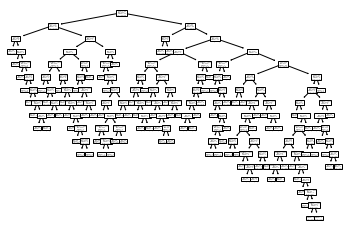

In [ ]:
plot_tree(DecisionTree, feature_names =['PassengerId','Pclass','Gender','Age','SibSp','Embarked'] )
plt.savefig('out.pdf')